In [1]:
#files
import sys
#from os import listdir
sys.path.append('../data')
sys.path.append('../Librerias')
#from os.path import isfile, join

#own libs
import utils
import caract as dc
import dataset as ds
from models import SimpleRNN
from lstm_models import LSTM
import utils_2 as ut2
from traindata import trainData



#data and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

sns.set_style("darkgrid")


import numpy as np
import random
import os, errno
from tqdm import tqdm

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import torch.utils.data as data_utils


np.random.seed(seed=77)
torch.manual_seed(77)

c:\Users\consu\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
fpath = "/Users/consu/OneDrive/Documentos/GitHub/Tesis/data/low/"
#fpath = "/Users/granosftp/Documents/GitHub/Tesis/data/low/"
fname = "file1_080124.mat"
#cutoff = [8/1000, 11/1000]

data = trainData(fpath, fname, 'Amplitude')
train, val, test = data.split_data('Amplitude')

## **scaler**

In [3]:
# sub sampleo

train = utils.subsample(train, 2)
val = utils.subsample(val, 2)
test = utils.subsample(test, 2)

In [4]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.reshape(-1, 1))
val_scaled = scaler.transform(val.reshape(-1, 1))
test_scaled = scaler.transform(test.reshape(-1, 1))

In [5]:
x_train, y_train = ut2.create_sequences(train_scaled[:10000], 1000, 50)
x_val, y_val = ut2.create_sequences(val_scaled[:5000], 1000, 50)
x_test, y_test = ut2.create_sequences(test_scaled[:3000], 1000, 50)

In [6]:
'''x_train, y_train = ut2.create_sequences(train_scaled[:200000], 1000, 50)
x_val, y_val = ut2.create_sequences(val_scaled[:45000], 1000, 50)
x_test, y_test = ut2.create_sequences(test_scaled[:45000], 1000, 50)

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape'''

'x_train, y_train = ut2.create_sequences(train_scaled[:200000], 1000, 50)\nx_val, y_val = ut2.create_sequences(val_scaled[:45000], 1000, 50)\nx_test, y_test = ut2.create_sequences(test_scaled[:45000], 1000, 50)\n\nx_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape'

In [7]:
x_train = torch.from_numpy(x_train.astype(np.float32)).squeeze()
y_train = torch.from_numpy(y_train.astype(np.float32)).squeeze()
x_val = torch.from_numpy(x_val.astype(np.float32)).squeeze()
y_val = torch.from_numpy(y_val.astype(np.float32)).squeeze()
x_test = torch.from_numpy(x_test.astype(np.float32)).squeeze()
y_test = torch.from_numpy(y_test.astype(np.float32)).squeeze()

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

(torch.Size([8951, 1000]),
 torch.Size([8951, 50]),
 torch.Size([3951, 1000]),
 torch.Size([3951, 50]),
 torch.Size([1951, 1000]),
 torch.Size([1951, 50]))

## **Single step**

In [11]:
class MLP(nn.Module):
    '''
    Multi-layer perceptron for non-linear regression.
    '''
    def __init__(self, in_size, hid_size, out_size):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(in_size, hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, out_size)
        )

    def forward(self, x):
        return(self.layers(x))

In [12]:
in_size = x_train.shape[-1]
out_size = y_train.shape[-1]
hid_size = x_train.shape[-1]//2
num_layers = 2

model = MLP(in_size, hid_size, out_size)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

  0%|          | 0/100 [00:00<?, ?it/s]

  4%|▍         | 4/100 [00:05<02:01,  1.27s/it]

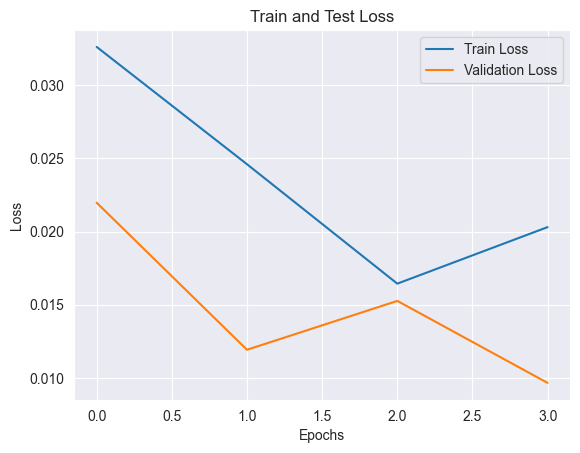

  5%|▌         | 5/100 [00:06<02:15,  1.42s/it]

Epoch :0.05    Train Loss :0.012895085848867893    Test Loss :0.011566375382244587


  9%|▉         | 9/100 [00:12<02:01,  1.34s/it]

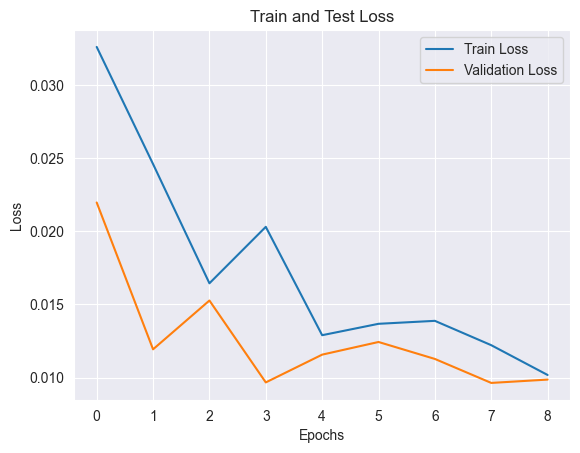

 10%|█         | 10/100 [00:13<02:12,  1.47s/it]

Epoch :0.1    Train Loss :0.010071821510791779    Test Loss :0.010088100098073483


 13%|█▎        | 13/100 [00:17<02:01,  1.40s/it]

Early stopping at epoch:  12


 14%|█▍        | 14/100 [00:19<01:58,  1.38s/it]

Early stopping at epoch:  13


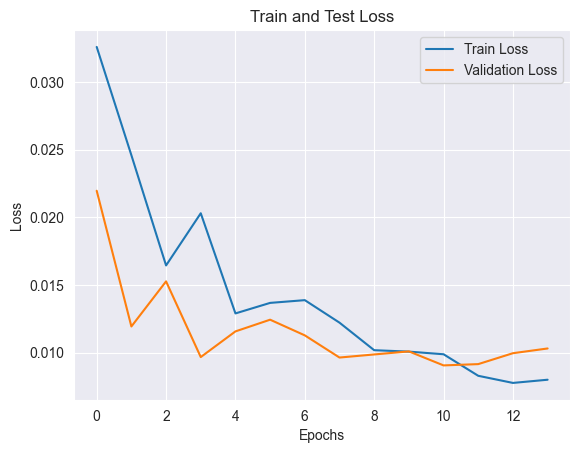

 15%|█▌        | 15/100 [00:20<02:06,  1.49s/it]

Epoch :0.15    Train Loss :0.007894565351307392    Test Loss :0.010076910257339478
Early stopping at epoch:  14


 16%|█▌        | 16/100 [00:22<02:00,  1.44s/it]

Early stopping at epoch:  15


 17%|█▋        | 17/100 [00:23<01:55,  1.39s/it]

Early stopping at epoch:  16


 18%|█▊        | 18/100 [00:24<01:49,  1.33s/it]

Early stopping at epoch:  17


 19%|█▉        | 19/100 [00:26<01:45,  1.31s/it]

Early stopping at epoch:  18


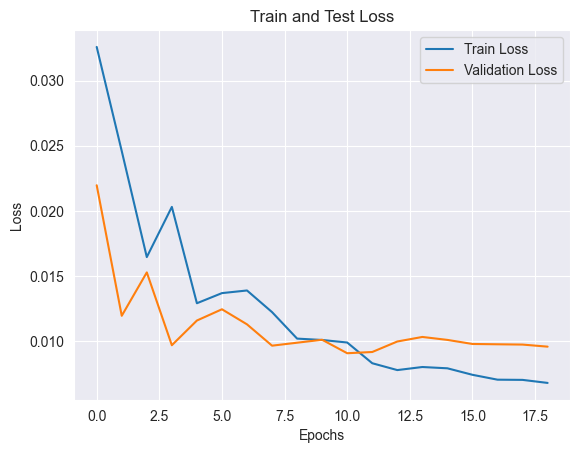

 20%|██        | 20/100 [00:27<01:54,  1.43s/it]

Epoch :0.2    Train Loss :0.006210562773048878    Test Loss :0.009525062516331673
Early stopping at epoch:  19


 21%|██        | 21/100 [00:28<01:47,  1.37s/it]

Early stopping at epoch:  20


 22%|██▏       | 22/100 [00:30<01:43,  1.33s/it]

Early stopping at epoch:  21


 23%|██▎       | 23/100 [00:31<01:41,  1.32s/it]

Early stopping at epoch:  22


 24%|██▍       | 24/100 [00:32<01:38,  1.30s/it]

Early stopping at epoch:  23


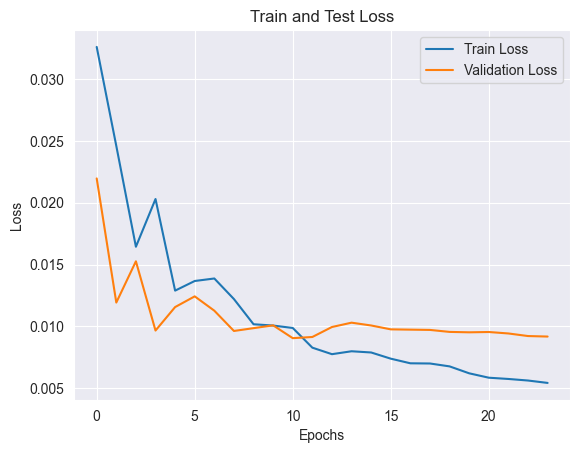

 25%|██▌       | 25/100 [00:34<01:44,  1.40s/it]

Epoch :0.25    Train Loss :0.005347874015569687    Test Loss :0.009289450012147427
Early stopping at epoch:  24


 26%|██▌       | 26/100 [00:35<01:42,  1.39s/it]

Early stopping at epoch:  25


 27%|██▋       | 27/100 [00:37<01:40,  1.37s/it]

Early stopping at epoch:  26


 28%|██▊       | 28/100 [00:38<01:35,  1.33s/it]

Early stopping at epoch:  27


 29%|██▉       | 29/100 [00:39<01:33,  1.31s/it]

Early stopping at epoch:  28


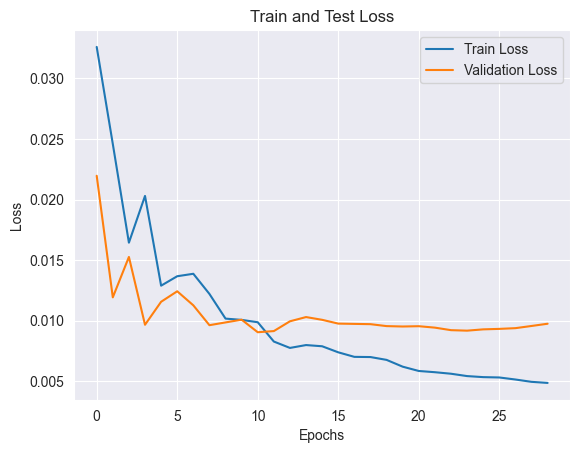

 30%|███       | 30/100 [00:41<01:40,  1.43s/it]

Epoch :0.3    Train Loss :0.004795892164111137    Test Loss :0.009833010844886303
Early stopping at epoch:  29


 31%|███       | 31/100 [00:42<01:34,  1.37s/it]

Early stopping at epoch:  30


 32%|███▏      | 32/100 [00:43<01:31,  1.34s/it]

Early stopping at epoch:  31


 33%|███▎      | 33/100 [00:45<01:28,  1.32s/it]

Early stopping at epoch:  32


 34%|███▍      | 34/100 [00:46<01:26,  1.31s/it]

Early stopping at epoch:  33


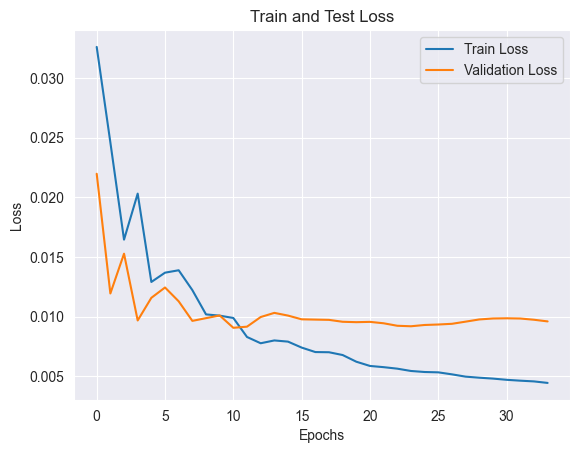

 35%|███▌      | 35/100 [00:48<01:33,  1.44s/it]

Epoch :0.35    Train Loss :0.0043197995983064175    Test Loss :0.009457525797188282
Early stopping at epoch:  34


 36%|███▌      | 36/100 [00:49<01:29,  1.40s/it]

Early stopping at epoch:  35


 37%|███▋      | 37/100 [00:50<01:26,  1.37s/it]

Early stopping at epoch:  36


 38%|███▊      | 38/100 [00:51<01:21,  1.32s/it]

Early stopping at epoch:  37


 39%|███▉      | 39/100 [00:53<01:18,  1.29s/it]

Early stopping at epoch:  38


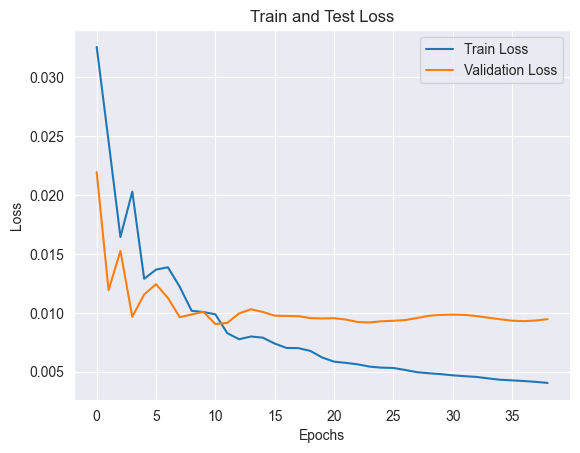

 40%|████      | 40/100 [00:54<01:25,  1.43s/it]

Epoch :0.4    Train Loss :0.003950852435082197    Test Loss :0.009648909792304039
Early stopping at epoch:  39


 41%|████      | 41/100 [00:56<01:23,  1.42s/it]

Early stopping at epoch:  40


 42%|████▏     | 42/100 [00:57<01:18,  1.35s/it]

Early stopping at epoch:  41


 43%|████▎     | 43/100 [00:58<01:15,  1.32s/it]

Early stopping at epoch:  42


 44%|████▍     | 44/100 [01:00<01:14,  1.33s/it]

Early stopping at epoch:  43


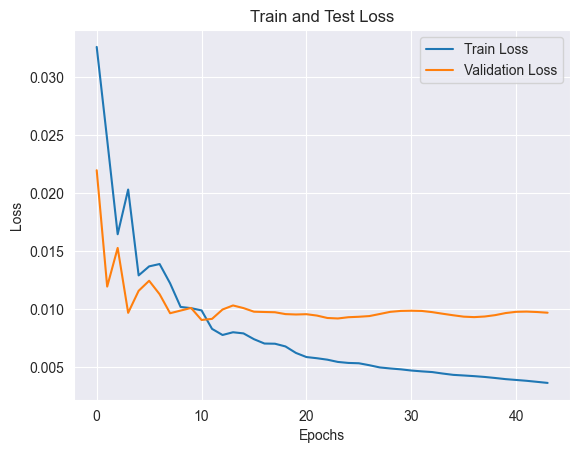

 45%|████▌     | 45/100 [01:01<01:18,  1.43s/it]

Epoch :0.45    Train Loss :0.0035417089238762856    Test Loss :0.009657657705247402
Early stopping at epoch:  44


 46%|████▌     | 46/100 [01:03<01:15,  1.40s/it]

Early stopping at epoch:  45


 47%|████▋     | 47/100 [01:04<01:12,  1.36s/it]

Early stopping at epoch:  46


 48%|████▊     | 48/100 [01:05<01:10,  1.35s/it]

Early stopping at epoch:  47


 49%|████▉     | 49/100 [01:06<01:08,  1.34s/it]

Early stopping at epoch:  48


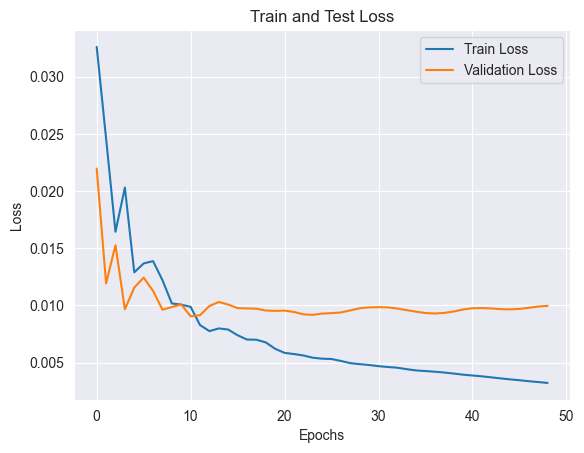

 50%|█████     | 50/100 [01:08<01:12,  1.45s/it]

Epoch :0.5    Train Loss :0.0031342636793851852    Test Loss :0.010005916468799114
Early stopping at epoch:  49


 51%|█████     | 51/100 [01:09<01:08,  1.40s/it]

Early stopping at epoch:  50


 52%|█████▏    | 52/100 [01:11<01:06,  1.38s/it]

Early stopping at epoch:  51


 53%|█████▎    | 53/100 [01:12<01:03,  1.36s/it]

Early stopping at epoch:  52


 54%|█████▍    | 54/100 [01:13<01:02,  1.36s/it]

Early stopping at epoch:  53


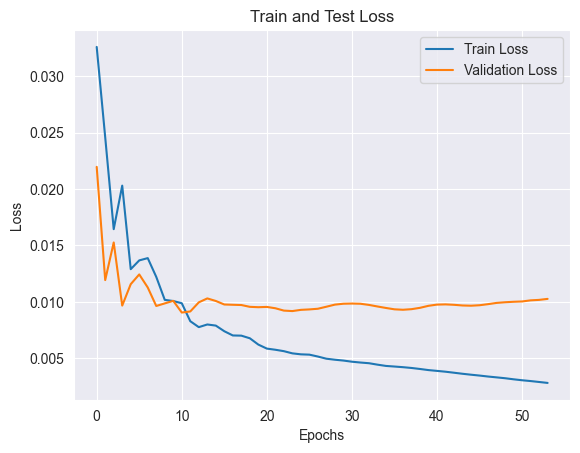

 55%|█████▌    | 55/100 [01:15<01:05,  1.45s/it]

Epoch :0.55    Train Loss :0.002743641845881939    Test Loss :0.010210228152573109
Early stopping at epoch:  54


 56%|█████▌    | 56/100 [01:16<01:01,  1.40s/it]

Early stopping at epoch:  55


 57%|█████▋    | 57/100 [01:18<00:58,  1.37s/it]

Early stopping at epoch:  56


 58%|█████▊    | 58/100 [01:19<00:56,  1.35s/it]

Early stopping at epoch:  57


 59%|█████▉    | 59/100 [01:20<00:54,  1.34s/it]

Early stopping at epoch:  58


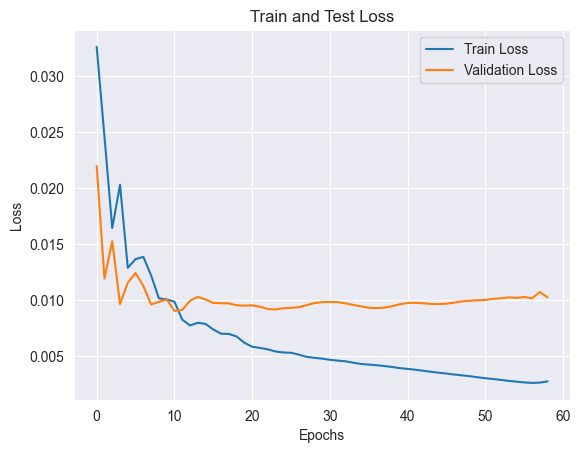

 60%|██████    | 60/100 [01:22<00:57,  1.44s/it]

Epoch :0.6    Train Loss :0.002794835017994046    Test Loss :0.010183535516262054
Early stopping at epoch:  59


 61%|██████    | 61/100 [01:23<00:54,  1.40s/it]

Early stopping at epoch:  60


 62%|██████▏   | 62/100 [01:25<00:51,  1.35s/it]

Early stopping at epoch:  61


 63%|██████▎   | 63/100 [01:26<00:49,  1.33s/it]

Early stopping at epoch:  62


 64%|██████▍   | 64/100 [01:27<00:47,  1.32s/it]

Early stopping at epoch:  63


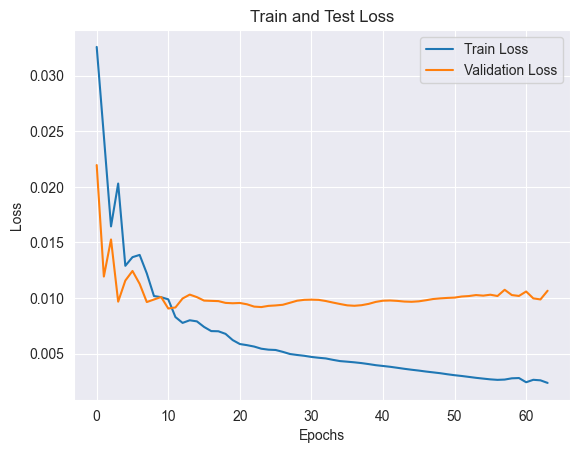

 65%|██████▌   | 65/100 [01:29<00:50,  1.44s/it]

Epoch :0.65    Train Loss :0.002618242520838976    Test Loss :0.009900272823870182
Early stopping at epoch:  64


 66%|██████▌   | 66/100 [01:30<00:47,  1.39s/it]

Early stopping at epoch:  65


 67%|██████▋   | 67/100 [01:31<00:44,  1.36s/it]

Early stopping at epoch:  66


 68%|██████▊   | 68/100 [01:33<00:42,  1.33s/it]

Early stopping at epoch:  67


 69%|██████▉   | 69/100 [01:34<00:40,  1.30s/it]

Early stopping at epoch:  68


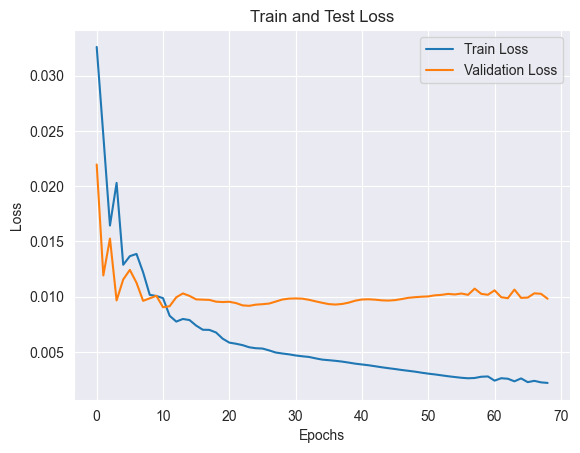

 70%|███████   | 70/100 [01:36<00:43,  1.44s/it]

Epoch :0.7    Train Loss :0.0022581603843718767    Test Loss :0.009912199340760708
Early stopping at epoch:  69


 71%|███████   | 71/100 [01:37<00:40,  1.39s/it]

Early stopping at epoch:  70


 72%|███████▏  | 72/100 [01:38<00:38,  1.36s/it]

Early stopping at epoch:  71


 73%|███████▎  | 73/100 [01:40<00:35,  1.33s/it]

Early stopping at epoch:  72


 74%|███████▍  | 74/100 [01:41<00:33,  1.30s/it]

Early stopping at epoch:  73


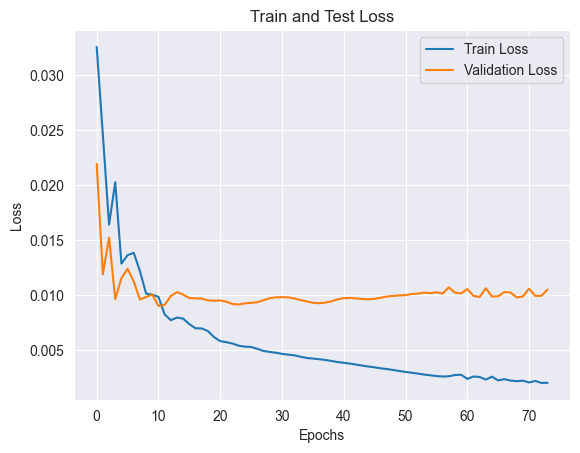

 75%|███████▌  | 75/100 [01:42<00:34,  1.40s/it]

Epoch :0.75    Train Loss :0.002051515504717827    Test Loss :0.010135785676538944
Early stopping at epoch:  74


 76%|███████▌  | 76/100 [01:44<00:32,  1.34s/it]

Early stopping at epoch:  75


 77%|███████▋  | 77/100 [01:45<00:30,  1.31s/it]

Early stopping at epoch:  76


 78%|███████▊  | 78/100 [01:46<00:28,  1.29s/it]

Early stopping at epoch:  77


 79%|███████▉  | 79/100 [01:47<00:27,  1.31s/it]

Early stopping at epoch:  78


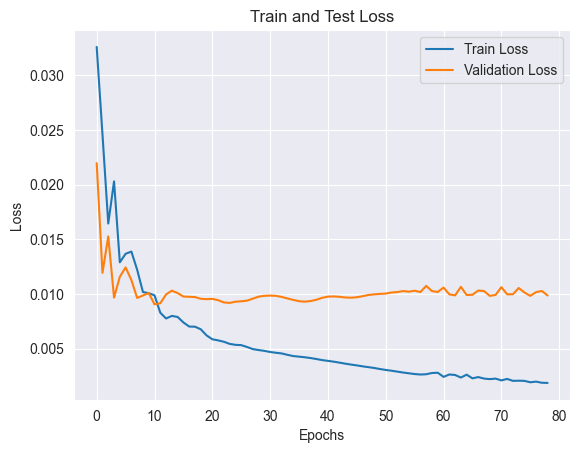

 80%|████████  | 80/100 [01:49<00:29,  1.45s/it]

Epoch :0.8    Train Loss :0.0018702560337260365    Test Loss :0.010093866847455502
Early stopping at epoch:  79


 81%|████████  | 81/100 [01:50<00:26,  1.40s/it]

Early stopping at epoch:  80


 82%|████████▏ | 82/100 [01:52<00:24,  1.37s/it]

Early stopping at epoch:  81


 83%|████████▎ | 83/100 [01:53<00:23,  1.36s/it]

Early stopping at epoch:  82


 84%|████████▍ | 84/100 [01:54<00:21,  1.35s/it]

Early stopping at epoch:  83


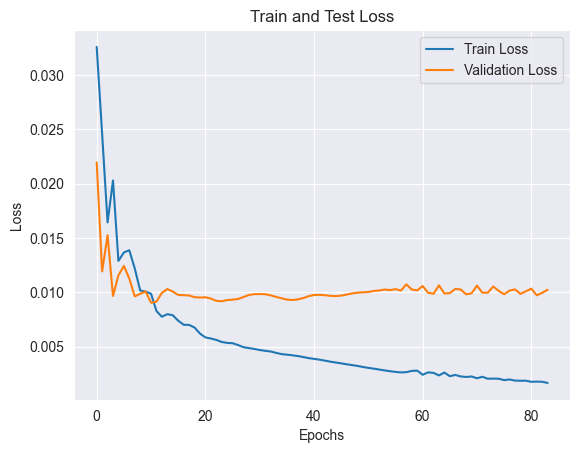

 85%|████████▌ | 85/100 [01:56<00:21,  1.45s/it]

Epoch :0.85    Train Loss :0.0016756912227720022    Test Loss :0.009683058597147465
Early stopping at epoch:  84


 86%|████████▌ | 86/100 [01:57<00:19,  1.37s/it]

Early stopping at epoch:  85


 87%|████████▋ | 87/100 [01:59<00:17,  1.35s/it]

Early stopping at epoch:  86


 88%|████████▊ | 88/100 [02:00<00:15,  1.31s/it]

Early stopping at epoch:  87


 89%|████████▉ | 89/100 [02:01<00:14,  1.28s/it]

Early stopping at epoch:  88


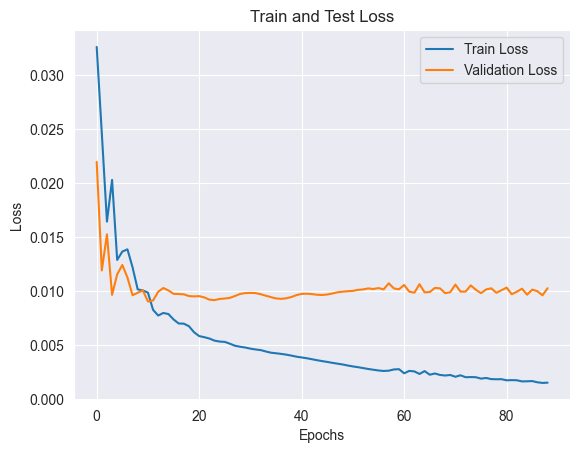

 90%|█████████ | 90/100 [02:03<00:14,  1.41s/it]

Epoch :0.9    Train Loss :0.0015207462711259723    Test Loss :0.009642379358410835
Early stopping at epoch:  89


 91%|█████████ | 91/100 [02:04<00:12,  1.35s/it]

Early stopping at epoch:  90


 92%|█████████▏| 92/100 [02:05<00:10,  1.34s/it]

Early stopping at epoch:  91


 93%|█████████▎| 93/100 [02:07<00:09,  1.35s/it]

Early stopping at epoch:  92


 94%|█████████▍| 94/100 [02:08<00:07,  1.33s/it]

Early stopping at epoch:  93


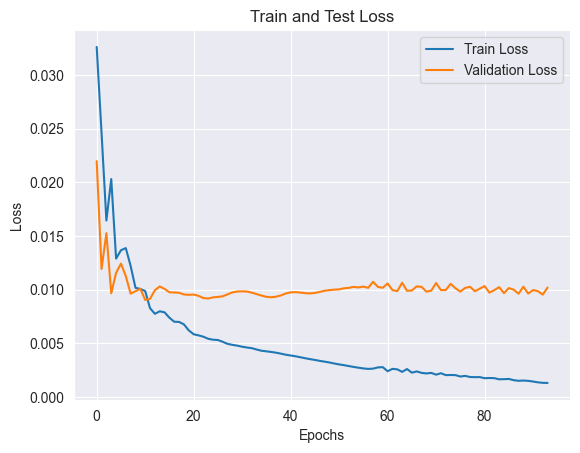

 95%|█████████▌| 95/100 [02:10<00:07,  1.42s/it]

Epoch :0.95    Train Loss :0.0013464968651533127    Test Loss :0.009365401230752468
Early stopping at epoch:  94


 96%|█████████▌| 96/100 [02:11<00:05,  1.35s/it]

Early stopping at epoch:  95


 97%|█████████▋| 97/100 [02:12<00:03,  1.33s/it]

Early stopping at epoch:  96


 98%|█████████▊| 98/100 [02:13<00:02,  1.32s/it]

Early stopping at epoch:  97


 99%|█████████▉| 99/100 [02:15<00:01,  1.31s/it]

Early stopping at epoch:  98


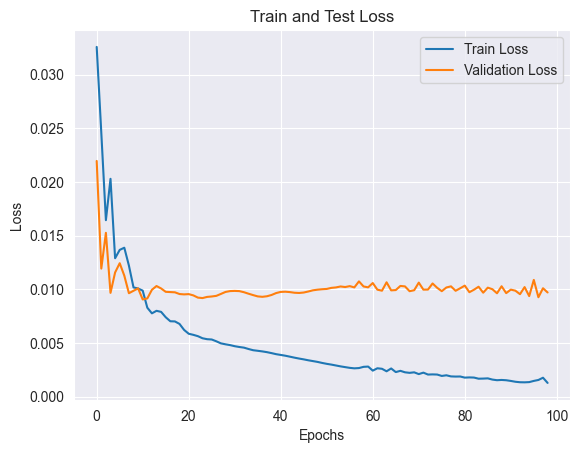

100%|██████████| 100/100 [02:16<00:00,  1.37s/it]

Epoch :1.0    Train Loss :0.0011572550283744931    Test Loss :0.009077407419681549
Early stopping at epoch:  99


In [13]:
train_loss, test_loss = ut2.simpleTrain_model(model,
                                            criterion,
                                            optimizer,
                                            x_train,
                                            x_val,
                                            y_train,
                                            y_val,
                                            epochs=100)

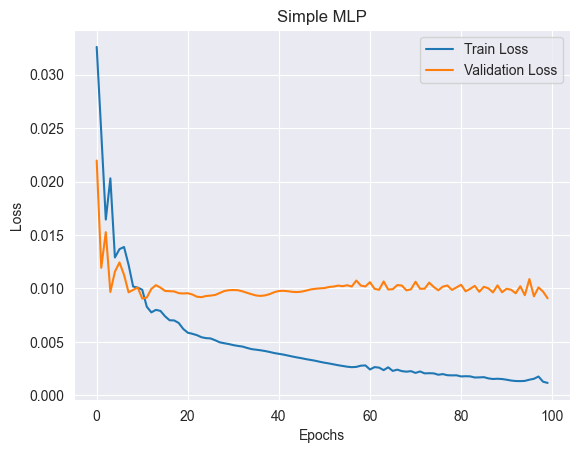

In [14]:
ut2.plot_loss(train_loss, test_loss, 'Simple MLP')

In [15]:
val_loss = np.asanyarray(test_loss)
train_loss = np.asanyarray(train_loss)
np.savetxt("train_lossSimpleLSTM.csv", train_loss, delimiter=",")
np.savetxt("val_lossSimpleLSTM.csv", val_loss, delimiter=",")

## **test predictions**

In [17]:
test_pred = model(x_test)

In [18]:
test_pred.size()

torch.Size([1951, 50])

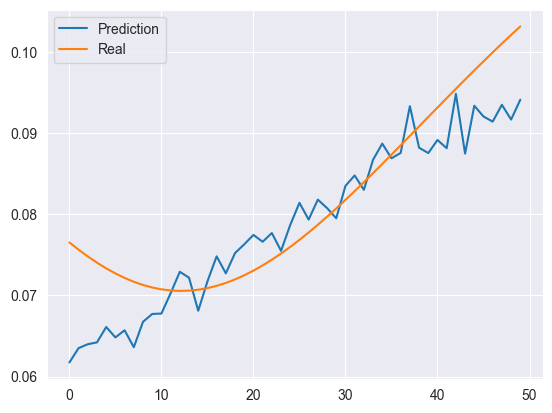

In [19]:
i = 65

plt.plot(test_pred[i].detach().numpy(), label='Prediction')
plt.plot(y_test[i].detach().numpy(), label='Real')
plt.legend()
plt.show()

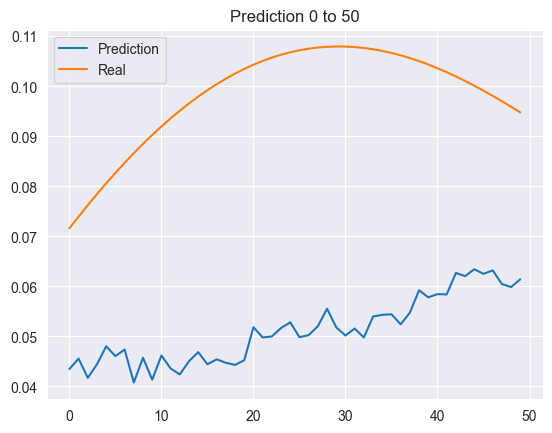

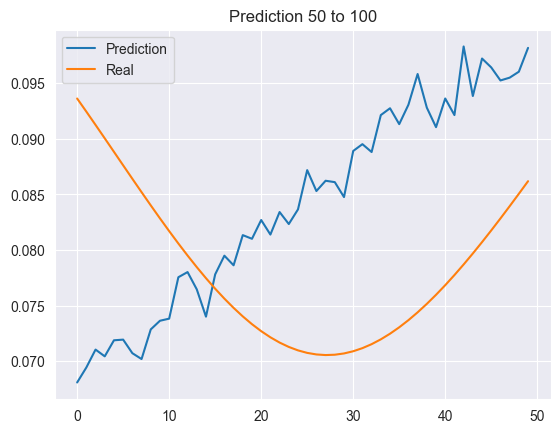

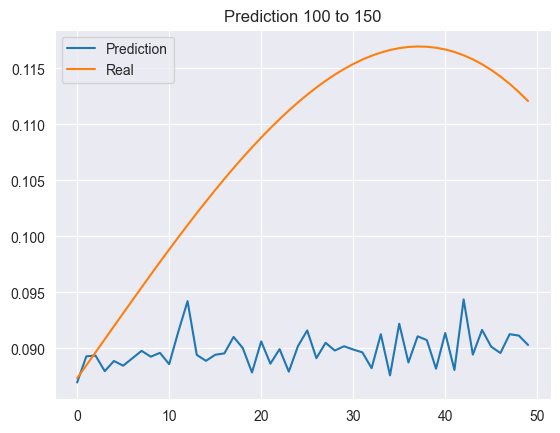

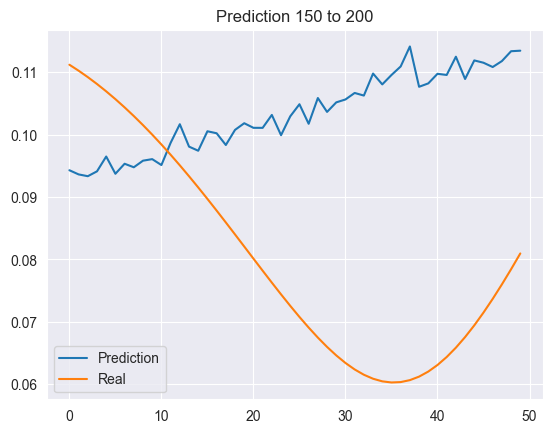

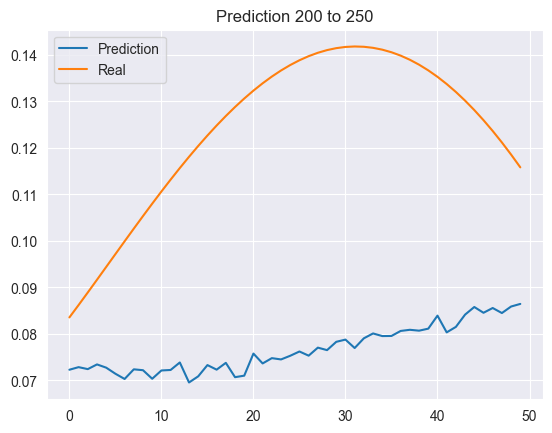

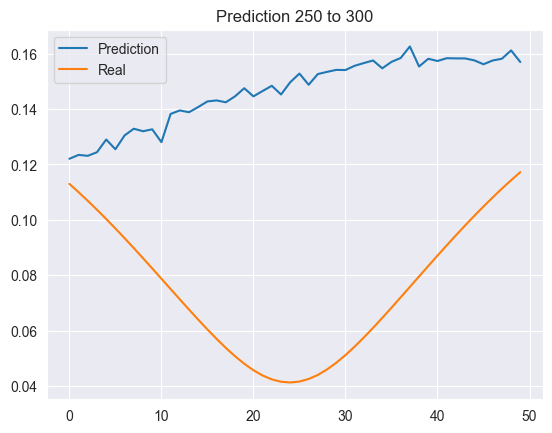

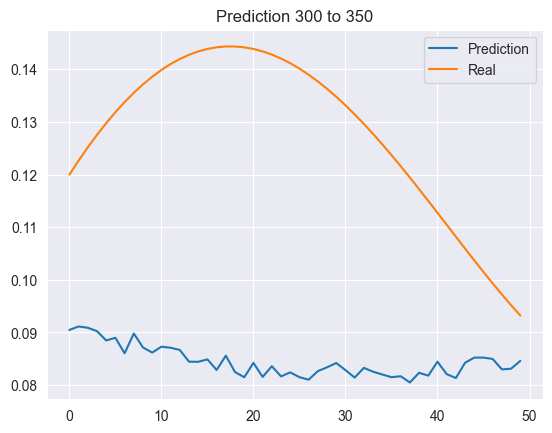

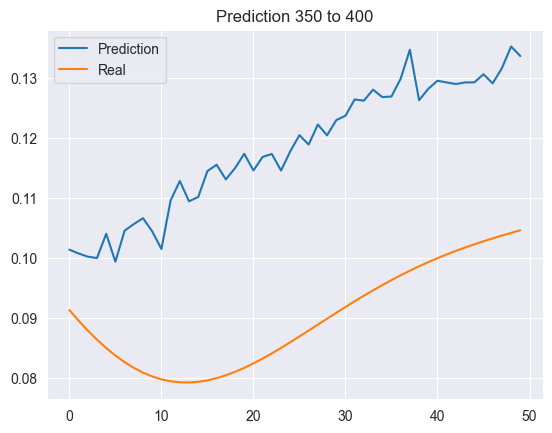

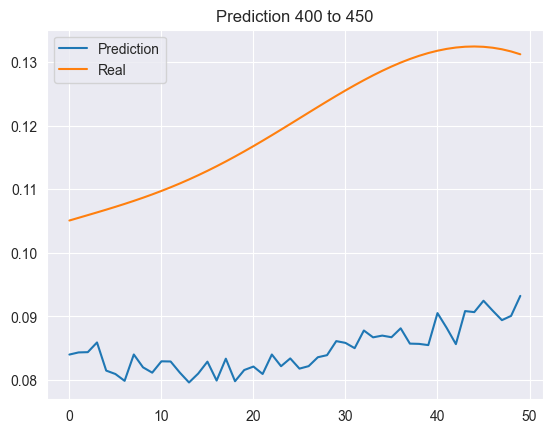

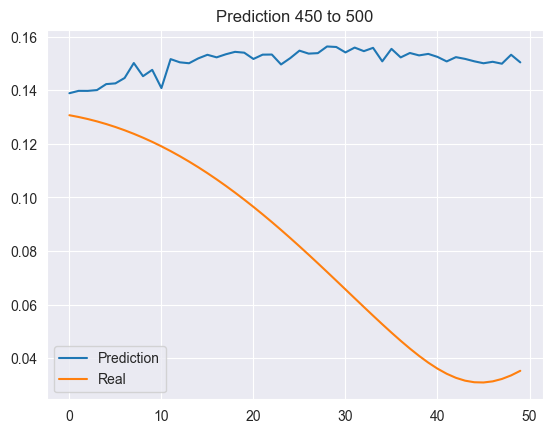

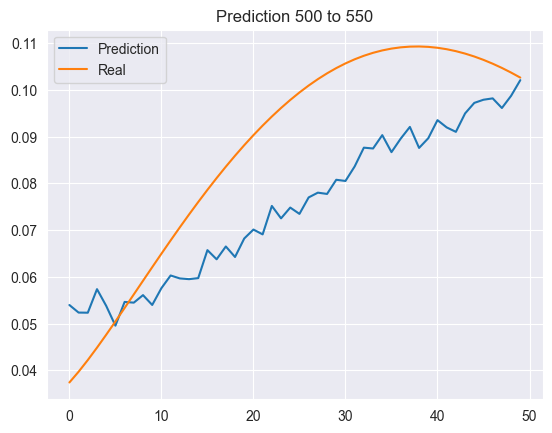

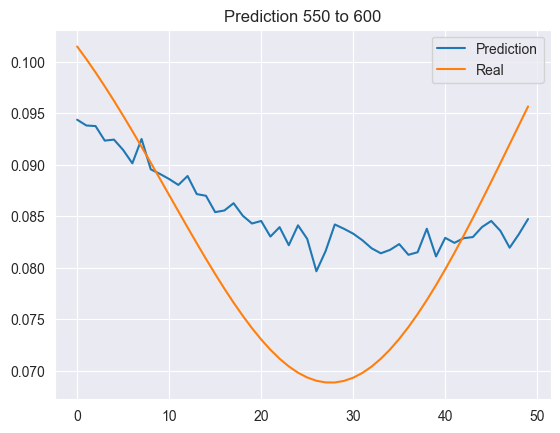

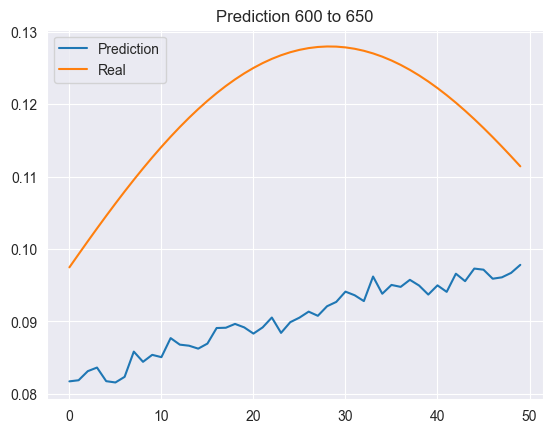

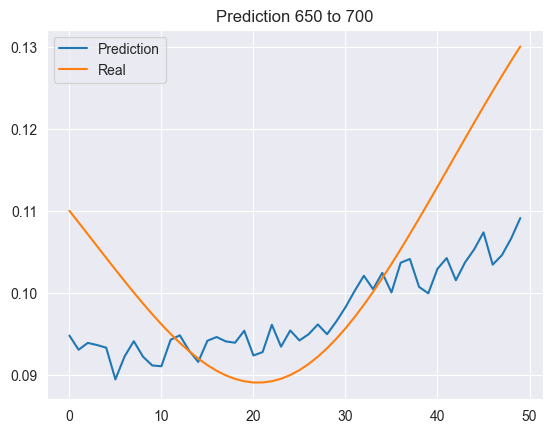

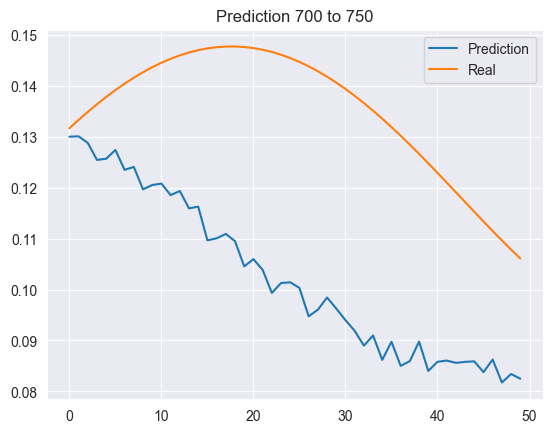

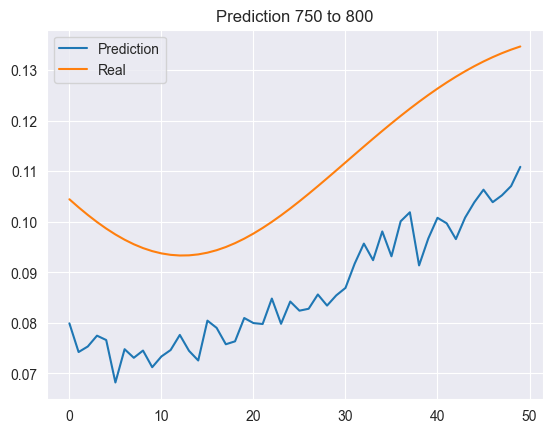

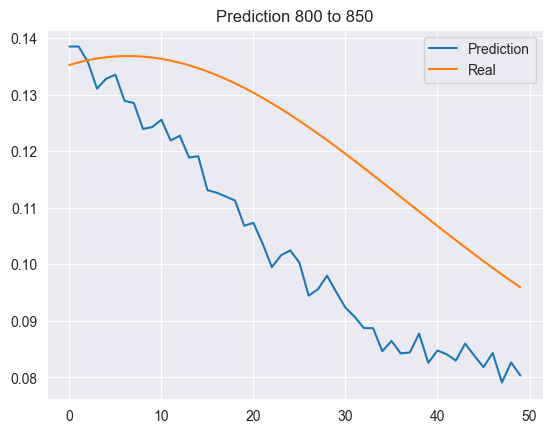

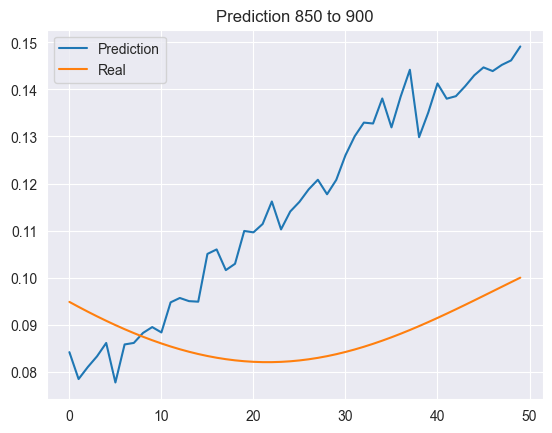

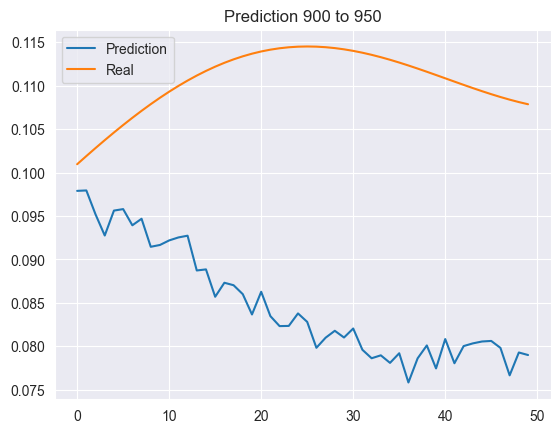

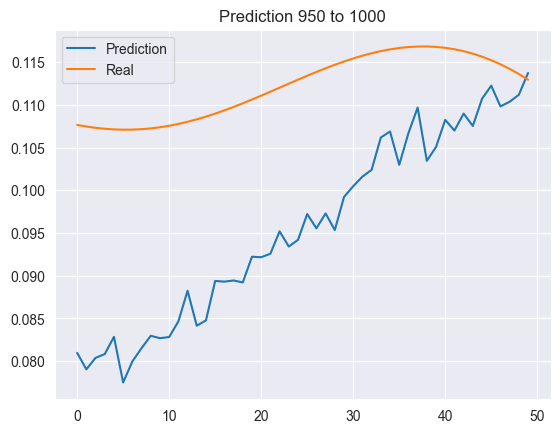

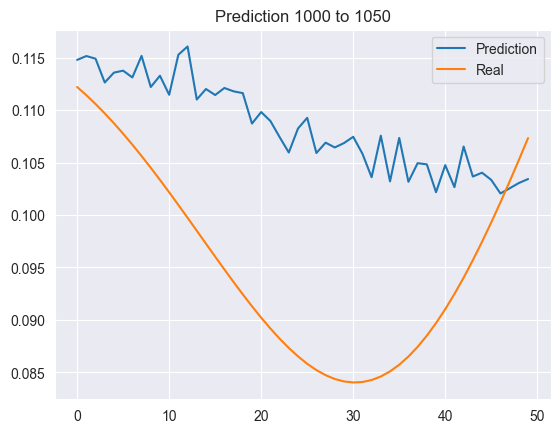

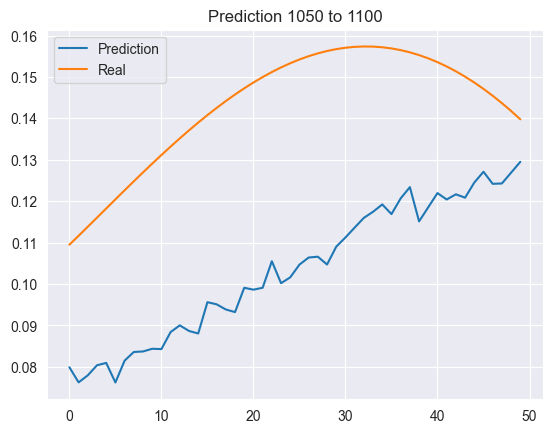

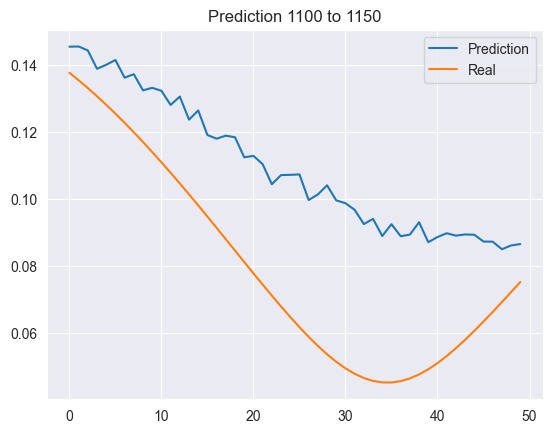

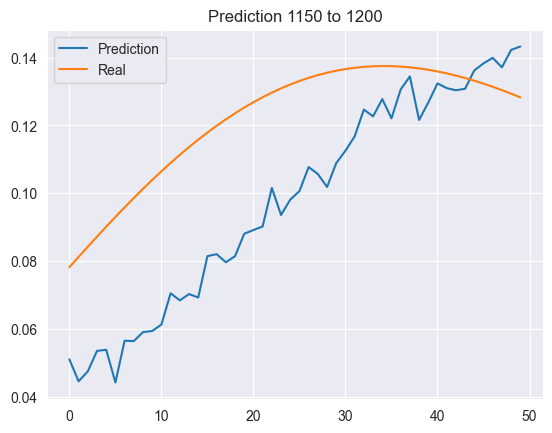

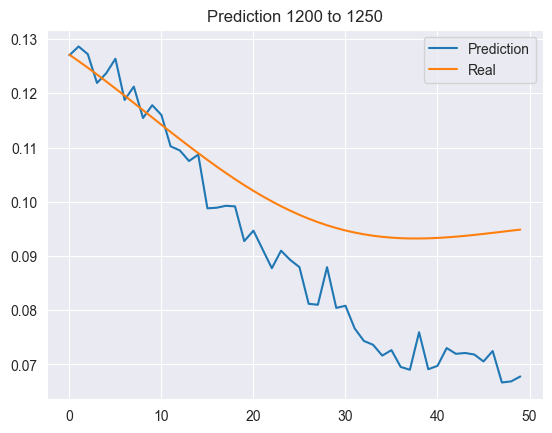

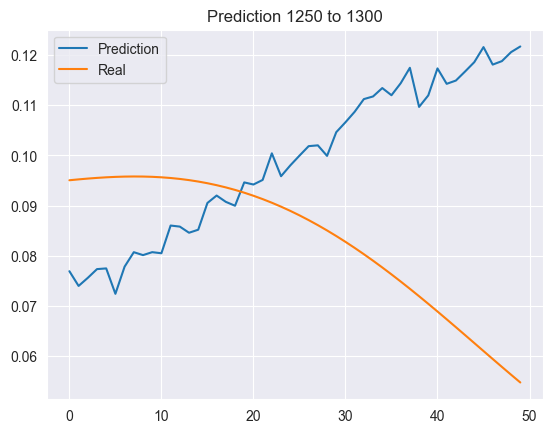

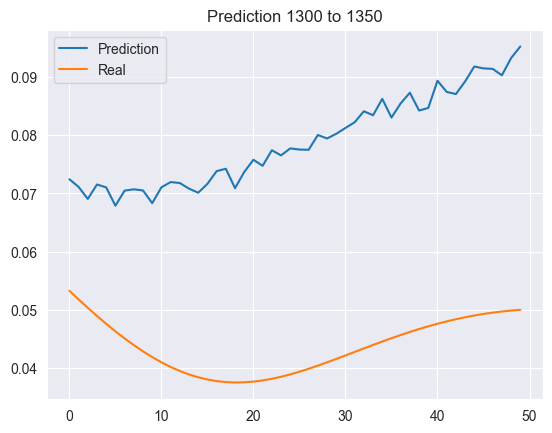

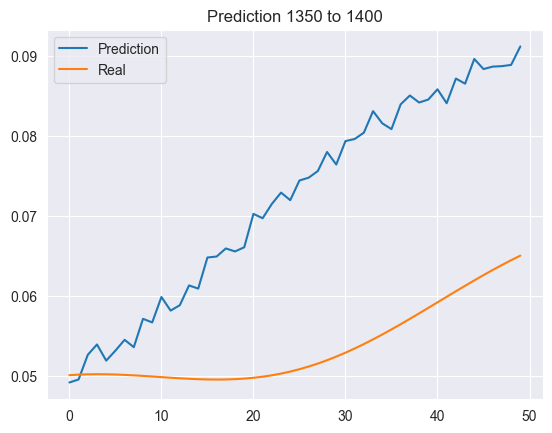

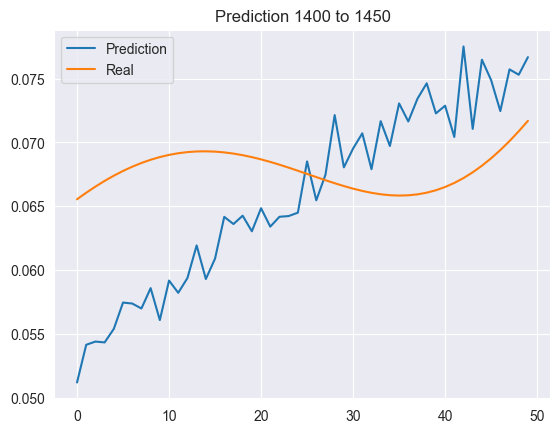

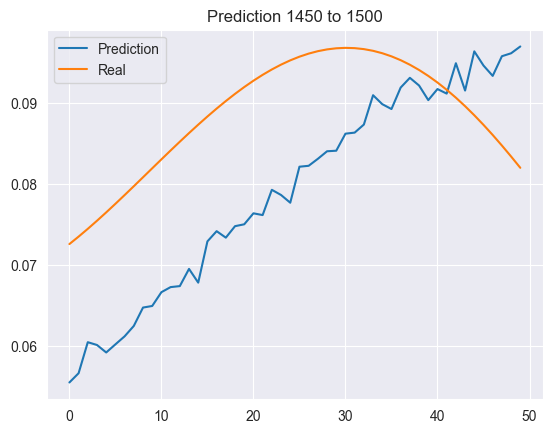

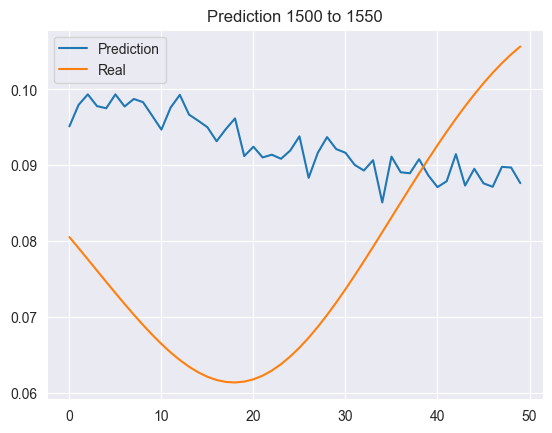

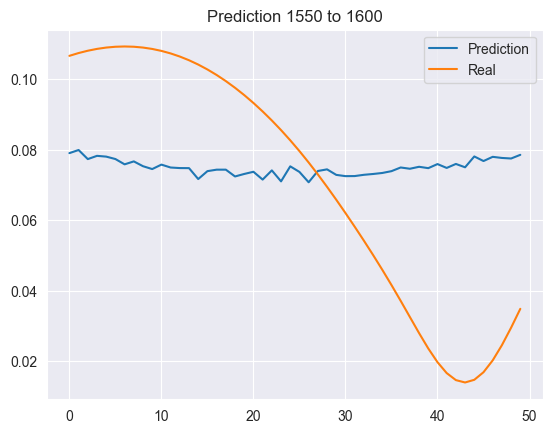

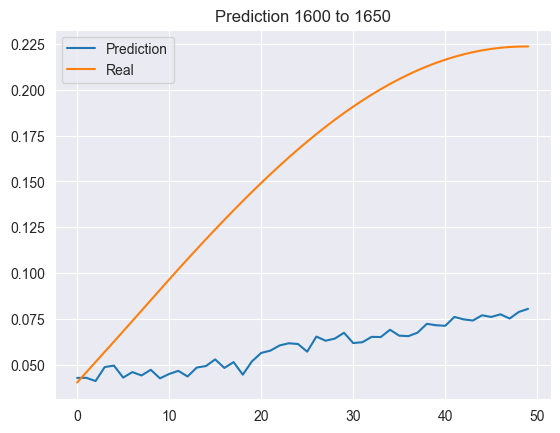

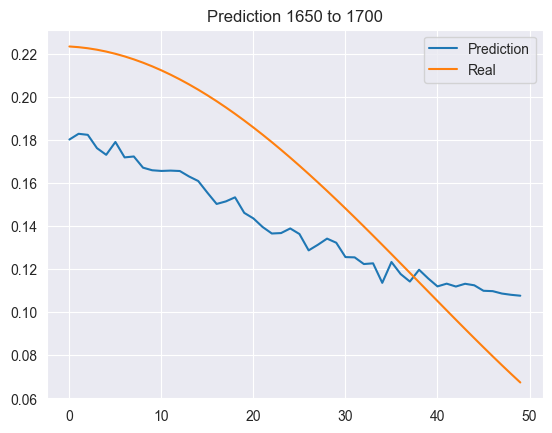

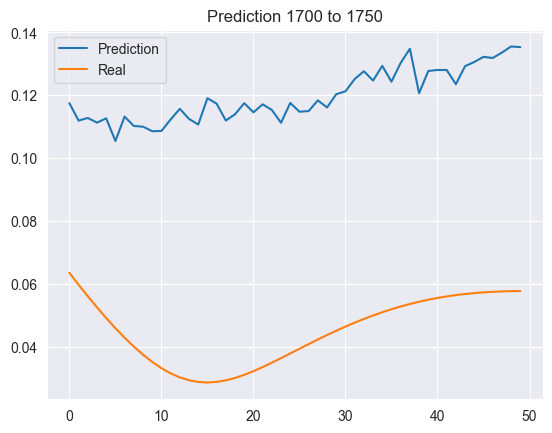

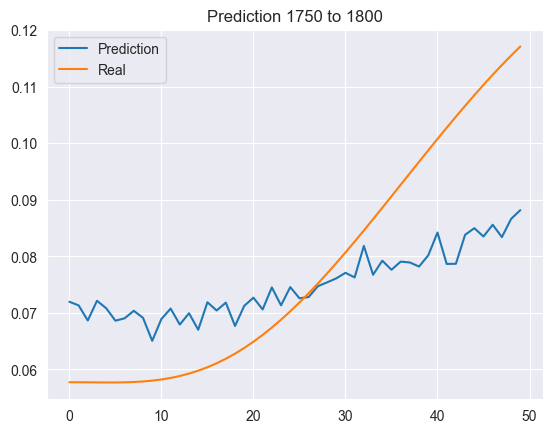

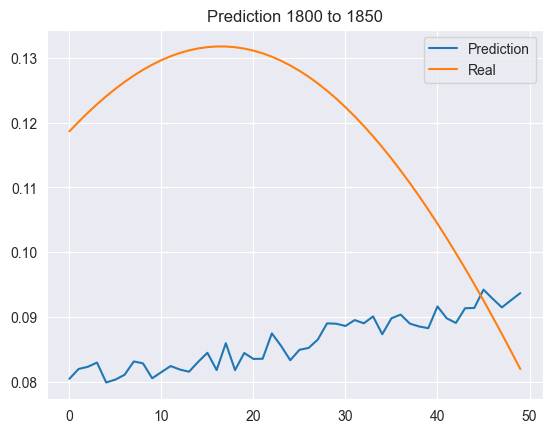

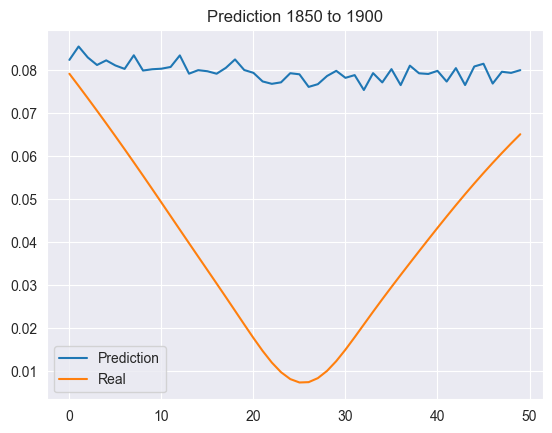

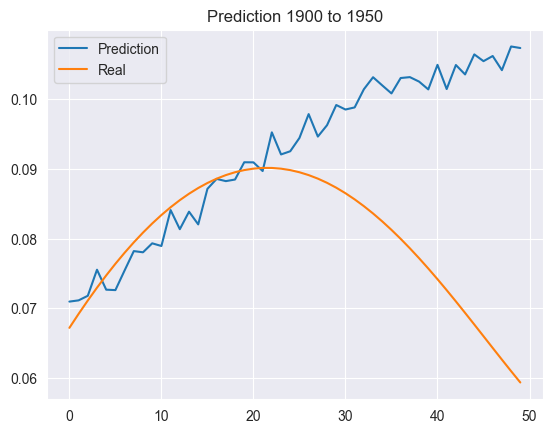

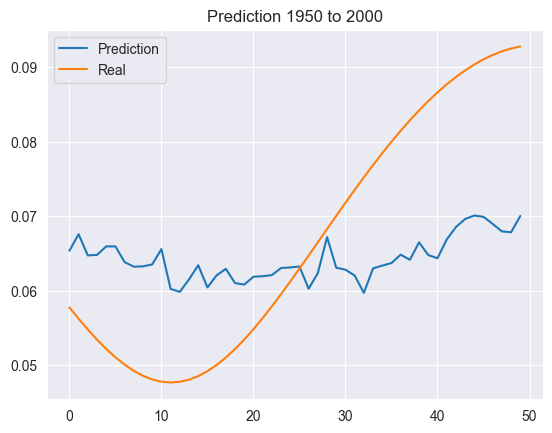

In [21]:
for i in range(0,len(test_pred), 50):
    plt.plot(test_pred[i].detach().numpy(), label='Prediction')
    plt.plot(y_test[i].detach().numpy(), label='Real')
    plt.title(f'Prediction {i} to {i+50}')
    plt.legend()
    plt.show()